In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
experiment_name = 'experiment_1'

In [3]:
savedir = '/workspace/visualizations/'
os.makedirs(os.path.join(savedir, experiment_name), exist_ok=True)

In [4]:
def read_dict_file(filename):
    with open(filename, 'r') as file:
        # Read each line and convert it to a dictionary using eval
        list_of_dicts = [eval(line.strip()) for line in file]
    df = pd.DataFrame.from_dict(list_of_dicts)
    return df

In [5]:
filename = os.path.join('/workspace', experiment_name, 'log.txt')
df = read_dict_file(filename)

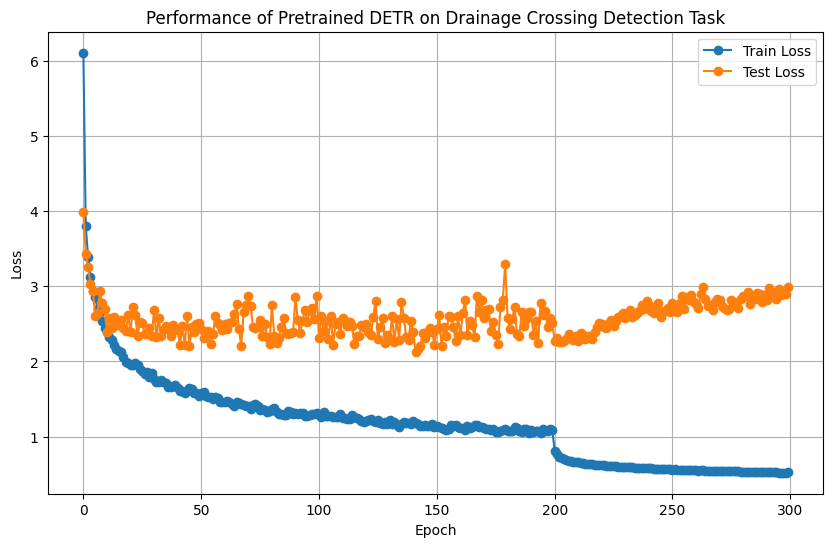

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o')
plt.plot(df['epoch'], df['test_loss'], label='Test Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Performance of Pretrained DETR on Drainage Crossing Detection Task')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(savedir, experiment_name, 'training_graph.png'))